In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
import time
from sklearn.metrics import confusion_matrix, mean_squared_error
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn import neural_network
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA,FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kurtosis
from sklearn.neural_network import MLPClassifier

data = load_breast_cancer()
data.keys()
x = data['data']
y = data['target']
x_shuffled, y_shuffled = shuffle(x,y,random_state=42) # 42 = the answer to the universe
x_train,y_train,x_test,y_test = x_shuffled[:500],y_shuffled[:500],x_shuffled[500:],y_shuffled[500:]

# scale the inputs
x_train = minmax_scale(x_train.astype(np.float64))
x_test = minmax_scale(x_test.astype(np.float64))


#y_train labels
# 0 = metastatic
# 1 = benign

In [2]:
inertias = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, n_init=1000, random_state=1).fit(x_train)
    inertias.append(kmeans.inertia_)

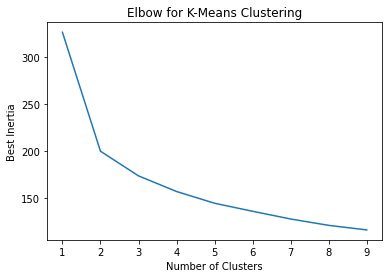

In [3]:
plt.plot(range(1,10),inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Best Inertia")
plt.title("Elbow for K-Means Clustering")
plt.savefig("Images2/kmeans_clusters_inertia.png")
plt.show()

In [4]:
kmeans = KMeans(n_clusters=2, n_init=1000, random_state=1).fit(x_train)

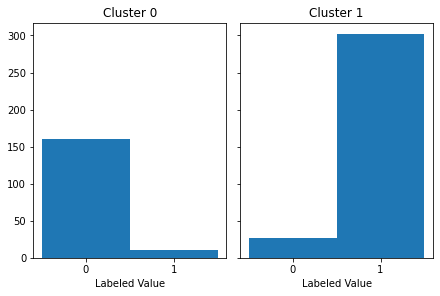

In [5]:
cat0 = []
cat1 = []
for i in range(0,len(x_train)):
    if kmeans.labels_[i]==0:
        cat0.append(y_train[i])
    elif kmeans.labels_[i]==1:
        cat1.append(y_train[i])

fig,axs = plt.subplots(1,2,figsize=(6,4),sharey=True,constrained_layout=True)
axs[0].hist(cat0,bins=[-0.5,0.5,1.5])
axs[0].set_title('Cluster 0')
axs[0].set_xticks([0,1])
axs[0].set_xlabel('Labeled Value')
axs[1].hist(cat1,bins=[-0.5,0.5,1.5])
axs[1].set_title('Cluster 1')
axs[1].set_xticks([0,1])
axs[1].set_xlabel('Labeled Value')
plt.savefig("Images2/kmeans_categoriesvslabels.png")
plt.show()

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,kmeans.labels_)

0.924

In [7]:
bic = []
aic = []
for i in range(1,10):
    gmm = GaussianMixture(n_components=i, n_init=100,covariance_type='full', random_state=1)
    gmm = gmm.fit(x_train)
    bic.append(gmm.bic(x_train))
    aic.append(gmm.aic(x_train))

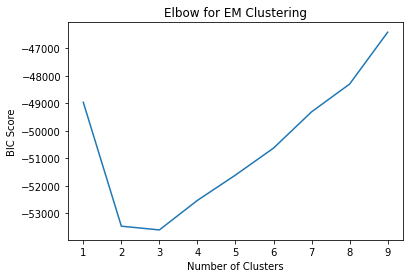

In [8]:
plt.plot(range(1,10),bic)
plt.xlabel("Number of Clusters")
plt.ylabel("BIC Score")
plt.title("Elbow for EM Clustering")
plt.savefig("Images2/gm_clusters_bic.png")
plt.show()

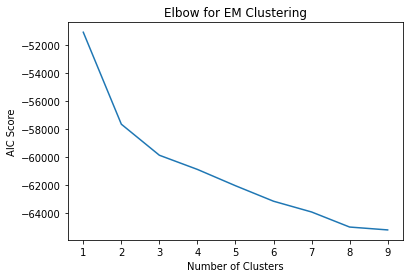

In [9]:
plt.plot(range(1,10),aic)
plt.xlabel("Number of Clusters")
plt.ylabel("AIC Score")
plt.title("Elbow for EM Clustering")
plt.savefig("Images2/gm_clusters_aic.png")
plt.show()

In [10]:
gmm = GaussianMixture(n_components=2, n_init=100,covariance_type='full', random_state=1)
gm_labels = gmm.fit_predict(x_train)

In [11]:
accuracy_score(y_train,gm_labels)

0.94

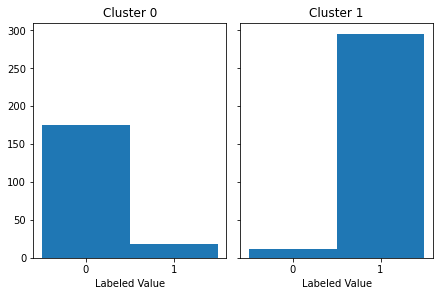

In [12]:
cat0 = []
cat1 = []
for i in range(0,len(x_train)):
    if gm_labels[i]==0:
        cat0.append(y_train[i])
    elif gm_labels[i]==1:
        cat1.append(y_train[i])

fig,axs = plt.subplots(1,2,figsize=(6,4),sharey=True,constrained_layout=True)
axs[0].hist(cat0,bins=[-0.5,0.5,1.5])
axs[0].set_title('Cluster 0')
axs[0].set_xticks([0,1])
axs[0].set_xlabel('Labeled Value')
axs[1].hist(cat1,bins=[-0.5,0.5,1.5])
axs[1].set_title('Cluster 1')
axs[1].set_xticks([0,1])
axs[1].set_xlabel('Labeled Value')
plt.savefig("Images2/gm_categoriesvslabels.png")
plt.show()

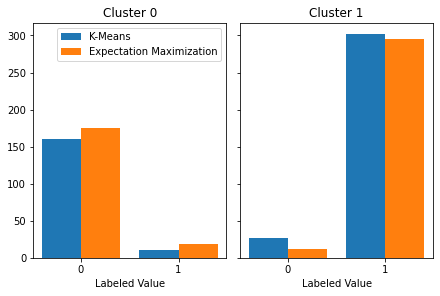

In [13]:
cat0 = []
cat1 = []
for i in range(0,len(x_train)):
    if kmeans.labels_[i]==0:
        cat0.append(y_train[i])
    elif kmeans.labels_[i]==1:
        cat1.append(y_train[i])

cat0_gm = []
cat1_gm = []
for i in range(0,len(x_train)):
    if gm_labels[i]==0:
        cat0_gm.append(y_train[i])
    elif gm_labels[i]==1:
        cat1_gm.append(y_train[i])

fig,axs = plt.subplots(1,2,figsize=(6,4),sharey=True,constrained_layout=True)
axs[0].hist([cat0,cat0_gm],bins=[-0.5,0.5,1.5],label=["K-Means","Expectation Maximization"])
axs[0].set_title('Cluster 0')
axs[0].set_xticks([0,1])
axs[0].set_xlabel('Labeled Value')
axs[0].legend()
axs[1].hist([cat1,cat1_gm],bins=[-0.5,0.5,1.5])
axs[1].set_title('Cluster 1')
axs[1].set_xticks([0,1])
axs[1].set_xlabel('Labeled Value')
plt.savefig("Images2/kmeans_gm_combined_categoriesvslabels.png")
plt.show()

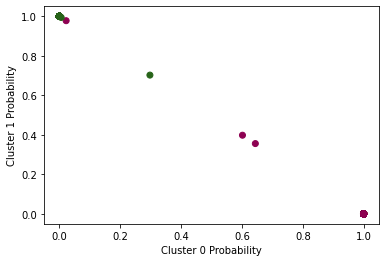

In [14]:
probabilities = gmm.predict_proba(x_train)
plt.scatter(probabilities[:,0],probabilities[:,1],c=y_train,cmap="PiYG")
plt.xlabel("Cluster 0 Probability")
plt.ylabel("Cluster 1 Probability")
plt.show()

In [15]:
pca = PCA(n_components=30,random_state=1)
x_pca = pca.fit_transform(x_train)

In [16]:
#pca.components_[0]
pca.components_[1]

array([-0.26211127, -0.07393418, -0.23994013, -0.23296275,  0.22030194,
        0.20031111,  0.11253081, -0.01143175,  0.20549384,  0.39117733,
       -0.06881206,  0.05673833, -0.05276813, -0.08547868,  0.13529214,
        0.27148875,  0.10758472,  0.11209234,  0.14349378,  0.16541678,
       -0.25041488, -0.06806656, -0.21766049, -0.2055885 ,  0.20883404,
        0.18112755,  0.14714711,  0.03562351,  0.14042962,  0.2431005 ])

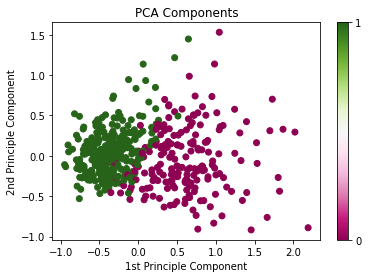

In [17]:
p = plt.scatter(x_pca[:,0],x_pca[:,1],c=y_train,cmap="PiYG")
c = plt.colorbar(p)
c.set_ticks([0,1])
c.set_ticklabels([0,1])
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.title('PCA Components')
plt.savefig('Images2/PCA_components12.png')
plt.show()

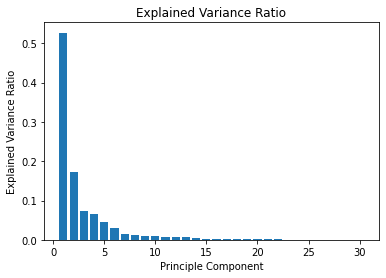

In [18]:
plt.bar(range(1,31),pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('Principle Component')
plt.ylabel('Explained Variance Ratio')
plt.savefig('Images2/PCA_Explained_Variance_Ratio.png')
plt.show()

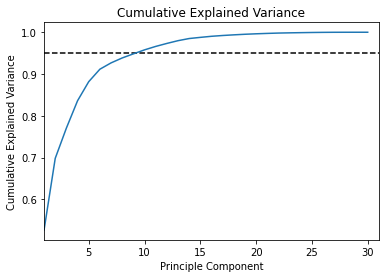

In [19]:
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,31), cumulative)
plt.hlines(0.95,1,731,color='black',linestyles='dashed')
plt.xlim(1,31)
plt.xlabel('Principle Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.savefig('Images2/PCA_cumulative_explained_variance.png')
plt.show()

In [20]:
thresh = np.argmin(abs(0.95-cumulative))
print(thresh)

8


In [21]:
reconst_error = []
for i in range(1,31):
    pca2 = PCA(n_components=i,random_state=1)
    x_pca2 = pca2.fit_transform(x_train)
    x_pca2_inv = pca2.inverse_transform(x_pca2)
    error = mean_squared_error(x_train,x_pca2_inv)
    reconst_error.append(error)

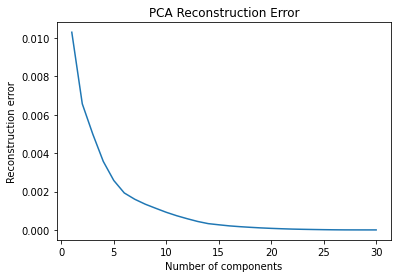

In [22]:
plt.plot(range(1,31),reconst_error)
plt.title("PCA Reconstruction Error")
plt.xlabel("Number of components")
plt.ylabel("Reconstruction error")
plt.savefig("Images2/pca_reconstruction_error.png")
plt.show()

In [23]:
ica = FastICA(max_iter=1000,random_state=1)
x_ica = ica.fit_transform(x_train)

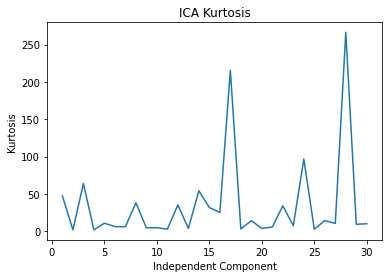

In [24]:
kurt = kurtosis(x_ica)
plt.plot(range(1,31),kurt)
plt.xlabel("Independent Component")
plt.ylabel("Kurtosis")
plt.title("ICA Kurtosis")
plt.savefig("Images2/ica_kurtosis")
plt.show()

In [25]:
kurtosis_features = []
for i,j in zip(kurt,list(range(0,30))):
    kurtosis_features.append([i,j])
    
kurtosis_features.sort(reverse=True)
print(kurtosis_features[0:10])

[[266.5914380480125, 27], [215.60063299248955, 16], [96.77252057050025, 23], [63.949290585344016, 2], [54.27713569227196, 13], [47.18613357124342, 0], [38.14802125927632, 7], [35.355326694762766, 11], [34.104986580014504, 21], [31.776761099327658, 14]]


In [26]:
kurt_sorted = sorted(kurt,reverse=True)

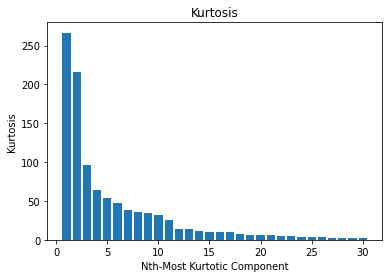

In [27]:
plt.bar(range(1,31),kurt_sorted)
plt.title('Kurtosis')
plt.xlabel('Nth-Most Kurtotic Component')
plt.ylabel('Kurtosis')
plt.savefig('Images2/ICA_Kurtosis_sorted.png')
plt.show()

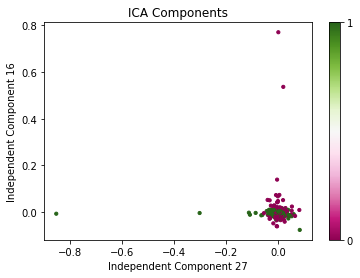

In [28]:
p = plt.scatter(x_ica[:,27],x_ica[:,16],10,c=y_train,cmap="PiYG")
c = plt.colorbar(p)
c.set_ticks([0,1])
c.set_ticklabels([0,1])
plt.xlabel("Independent Component 27")
plt.ylabel("Independent Component 16")
plt.title('ICA Components')
plt.savefig('Images2/ICA_components12.png')
plt.show()

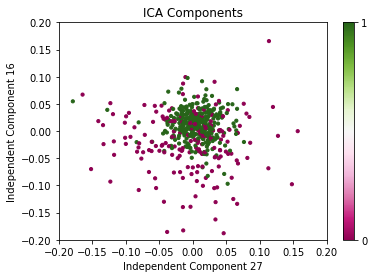

In [29]:
p = plt.scatter(x_ica[:,20],x_ica[:,8],10,c=y_train,cmap="PiYG")
c = plt.colorbar(p)
c.set_ticks([0,1])
c.set_ticklabels([0,1])
plt.xlim(-0.2,0.2)
plt.ylim(-0.2,0.2)
plt.xlabel("Independent Component 27")
plt.ylabel("Independent Component 16")
plt.title('ICA Components')
plt.savefig('Images2/ICA_components12_zoom.png')
plt.show()

In [30]:
kurtosis_vals = []
reconst_error_ica = []
for i in range(1,31):
    ica2 = FastICA(n_components=i,max_iter=10000,tol=0.01,random_state=1)
    x_ica2 = ica2.fit_transform(x_train)
    x_ica2_inv = ica2.inverse_transform(x_ica2)
    error = mean_squared_error(x_train,x_ica2_inv)
    kurt = kurtosis(x_ica2)
    kurtosis_vals.append(mean(kurt))
    reconst_error_ica.append(error)

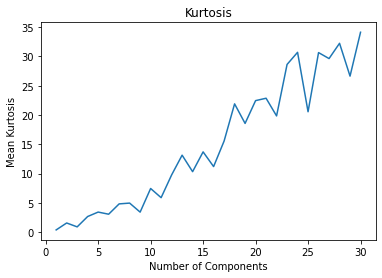

In [31]:
plt.plot(range(1,31),kurtosis_vals)
plt.title("Kurtosis")
plt.xlabel("Number of Components")
plt.ylabel("Mean Kurtosis")
plt.savefig("Images2/ica_kurtosis_n_components.png")
plt.show()

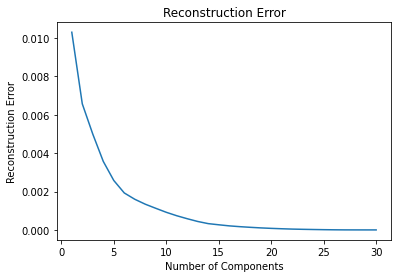

In [32]:
plt.plot(range(1,31),reconst_error_ica)
plt.title("Reconstruction Error")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")
plt.savefig("Images2/ica_reconstruction_error_n_components.png")
plt.show()

In [33]:
rp = GaussianRandomProjection(n_components=30,random_state=1)
x_rp = rp.fit_transform(x_train)

In [34]:
reconst_error_rp = [[],[],[],[],[],[],[],[],[],[]]
for j in range(0,10):
    for i in range(1,31):
        rp = GaussianRandomProjection(n_components=i,random_state=j)
        ##thanks Dan!  https://piazza.com/class/kjwtraqiv511du?cid=623_f43
        x_rp = rp.fit_transform(x_train)
        inverse_data = np.linalg.pinv((rp.components_.T))
        reconstructed_data = x_rp.dot(inverse_data)
        ###
        error = mean_squared_error(x_train,reconstructed_data)
        reconst_error_rp[j].append(error)

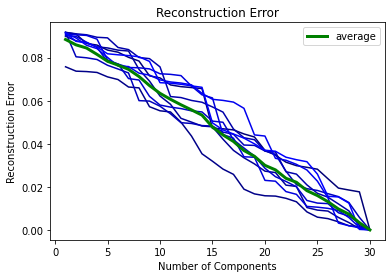

In [35]:
colors = ["#000066","#000077","#000088","#000099","#0000AA","#0000BB","#0000CC","#0000DD","#0000EE","#0000FF"]
avg = np.average(reconst_error_rp,axis=0)
for i in range(1,len(reconst_error_rp)):
    plt.plot(range(1,31),reconst_error_rp[i],color=colors[i])
plt.plot(range(1,31),avg,linewidth=3,color='green',label="average")
plt.legend()
plt.title("Reconstruction Error")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")
plt.savefig("Images2/rp_reconstruction_error_n_components.png")
plt.show()

In [36]:
avg[26]

0.009726190498826816

In [37]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [38]:
dt_features = dt.feature_importances_
indices = []
feature_imps = []
for i in range(0,len(dt_features)):
    if abs(dt_features[i]) > 0:
        indices.append(i)
        feature_imps.append(dt_features[i])
sorted_features = list(sorted(feature_imps,reverse=True))

In [39]:
indices

[1, 4, 6, 8, 13, 21, 23, 24, 25, 27]

In [40]:
grouped = []
for i,j in zip(feature_imps,indices):
    grouped.append((i,j))
grouped.sort(reverse=True)
print(grouped)

[(0.6375518035968356, 23), (0.15306469733277478, 27), (0.08995650232846268, 21), (0.04447558854801592, 6), (0.024707372710144573, 1), (0.020147508348056606, 13), (0.010580714101692366, 25), (0.00868561536587423, 8), (0.005777298844467502, 4), (0.00505289882367579, 24)]


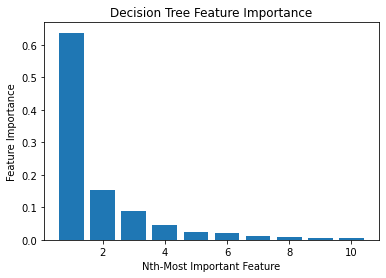

In [41]:
plt.bar(range(1,len(sorted_features)+1),sorted_features)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Nth-Most Important Feature')
plt.ylabel('Feature Importance')
plt.savefig('Images2/DT_Importance_sorted.png')
plt.show()

In [42]:
def dt_transform():
    x_dt = x_train.copy()
    x_dt = np.take(x_dt,indices,axis=1)
    return x_dt

def dt_inverse_transform(x_dt,num_keep=len(indices)):
    x_dt_inv = np.zeros(np.shape(x_train))
    for i in range(0,num_keep):
        x_dt_inv[:,indices[i]] = x_dt[:,i]
    return x_dt_inv

In [43]:
x_dt = dt_transform()
x_dt_inv = dt_inverse_transform(x_dt)

In [44]:
reconst_error_dt = []
for i in range(1,11):
    x_dt_inv = dt_inverse_transform(x_dt,i)
    error = mean_squared_error(x_train,x_dt_inv)
    reconst_error_dt.append(error)

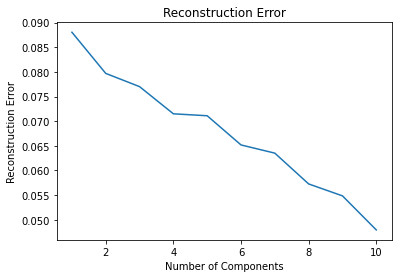

In [45]:
plt.plot(range(1,11),reconst_error_dt)
plt.title("Reconstruction Error")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")
plt.savefig("Images2/dt_reconstruction_error_n_components.png")
plt.show()

In [46]:
data.feature_names[23]

'worst area'

In [47]:
data.feature_names[27]

'worst concave points'

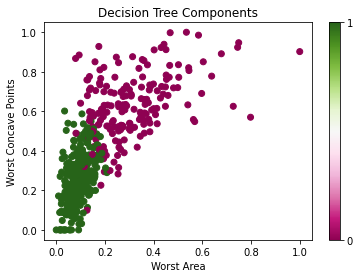

In [48]:
p = plt.scatter(x_train[:,23],x_train[:,27],c=y_train,cmap="PiYG")
plt.xlabel("Worst Area")
plt.ylabel("Worst Concave Points")
c = plt.colorbar(p)
c.set_ticks([0,1])
c.set_ticklabels([0,1])
plt.title('Decision Tree Components')
plt.savefig('Images2/DT_components12.png')
plt.show()

In [49]:
pca = PCA(n_components=9,random_state=1)
x_pca = pca.fit_transform(x_train)
ica = FastICA(n_components=11,max_iter=1000,random_state=1)
x_ica = ica.fit_transform(x_train)
rp = GaussianRandomProjection(n_components=27,random_state=1)
x_rp = rp.fit_transform(x_train)
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=1)
dt.fit(x_train,y_train)
x_dt = dt_transform()

In [50]:
kmeans_pca = KMeans(n_clusters=2, n_init=1000,random_state=1).fit(x_pca)
kmeans_ica = KMeans(n_clusters=2, n_init=1000,random_state=1).fit(x_ica)
kmeans_rp = KMeans(n_clusters=2, n_init=1000,random_state=1).fit(x_rp)
kmeans_dt = KMeans(n_clusters=2, n_init=1000,random_state=1).fit(x_dt)
kmeans = KMeans(n_clusters=2, n_init=1000, random_state=1).fit(x_train)

In [51]:
print(accuracy_score(y_train, kmeans_pca.labels_))
print(accuracy_score(y_train, kmeans_ica.labels_))
print(accuracy_score(y_train, abs(1-kmeans_rp.labels_)))
print(accuracy_score(y_train, abs(1-kmeans_dt.labels_)))
print(accuracy_score(y_train, kmeans.labels_))

0.924
0.948
0.874
0.908
0.924


In [52]:
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = silhouette_score(x_train,kmeans.labels_)
silhouette_score_pca = silhouette_score(x_pca,kmeans_pca.labels_)
silhouette_score_ica = silhouette_score(x_ica,kmeans_ica.labels_)
silhouette_score_rp = silhouette_score(x_rp,kmeans_rp.labels_)
silhouette_score_dt = silhouette_score(x_dt,kmeans_dt.labels_)
print(silhouette_score_kmeans)
print(silhouette_score_pca)
print(silhouette_score_ica)
print(silhouette_score_rp)
print(silhouette_score_dt)

0.37983089841424156
0.3959810036248168
0.12794563849697038
0.3425099534442677
0.38633795906012486


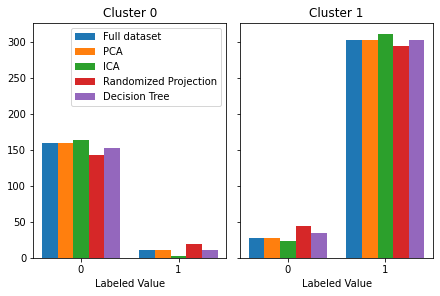

In [53]:
cat0 = []
cat1 = []
for i in range(0,len(x_train)):
    if kmeans.labels_[i]==0:
        cat0.append(y_train[i])
    elif kmeans.labels_[i]==1:
        cat1.append(y_train[i])
        
cat0_pca = []
cat1_pca = []
for i in range(0,len(x_train)):
    if kmeans_pca.labels_[i]==0:
        cat0_pca.append(y_train[i])
    elif kmeans_pca.labels_[i]==1:
        cat1_pca.append(y_train[i])
        
cat0_ica = []
cat1_ica = []
for i in range(0,len(x_train)):
    if kmeans_ica.labels_[i]==0:
        cat0_ica.append(y_train[i])
    elif kmeans_ica.labels_[i]==1:
        cat1_ica.append(y_train[i])
        
cat0_rp = []
cat1_rp = []
for i in range(0,len(x_train)):
    if kmeans_rp.labels_[i]==0:
        cat0_rp.append(y_train[i])
    elif kmeans_rp.labels_[i]==1:
        cat1_rp.append(y_train[i])
        
cat0_dt = []
cat1_dt = []
for i in range(0,len(x_train)):
    if kmeans_dt.labels_[i]==0:
        cat0_dt.append(y_train[i])
    elif kmeans_dt.labels_[i]==1:
        cat1_dt.append(y_train[i])

fig,axs = plt.subplots(1,2,figsize=(6,4),sharey=True,constrained_layout=True)
axs[0].hist([cat0,cat0_pca,cat0_ica,cat1_rp,cat1_dt],bins=[-0.5,0.5,1.5],label=["Full dataset","PCA","ICA","Randomized Projection","Decision Tree"])
axs[0].set_title('Cluster 0')
axs[0].set_xticks([0,1])
axs[0].set_xlabel('Labeled Value')
axs[0].legend()
axs[1].hist([cat1,cat1_pca,cat1_ica,cat0_rp,cat0_dt],bins=[-0.5,0.5,1.5],label=["Full dataset","PCA","ICA","Randomized Projection","Decision Tree"])
axs[1].set_title('Cluster 1')
axs[1].set_xticks([0,1])
axs[1].set_xlabel('Labeled Value')
plt.savefig("Images2/kmeans_dimreduce_categoriesvslabels.png")
plt.show()

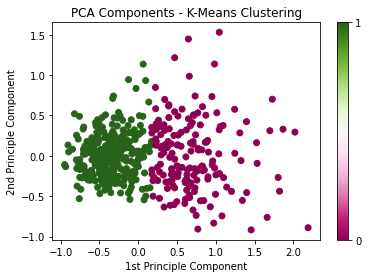

In [54]:
p = plt.scatter(x_pca[:,0],x_pca[:,1],c=kmeans_pca.labels_,cmap="PiYG")
c = plt.colorbar(p)
c.set_ticks([0,1])
c.set_ticklabels([0,1])
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.title('PCA Components - K-Means Clustering')
plt.savefig('Images2/components12_kmeans_pca_clusters.png')
plt.show()

In [55]:
gmm_pca = GaussianMixture(n_components=2, n_init=100,covariance_type='full', random_state=1)
gm_labels_pca = gmm_pca.fit_predict(x_pca)
gmm_ica = GaussianMixture(n_components=2, n_init=100,covariance_type='full', random_state=1)
gm_labels_ica = gmm_ica.fit_predict(x_ica)
gmm_rp = GaussianMixture(n_components=2, n_init=100,covariance_type='full', random_state=1)
gm_labels_rp = gmm_rp.fit_predict(x_rp)
gmm_dt = GaussianMixture(n_components=2, n_init=100,covariance_type='full', random_state=1)
gm_labels_dt = gmm_dt.fit_predict(x_dt)

In [56]:
print(accuracy_score(y_train, gm_labels_pca))
print(accuracy_score(y_train, abs(1-gm_labels_ica)))
print(accuracy_score(y_train, abs(1-gm_labels_rp)))
print(accuracy_score(y_train, abs(1-gm_labels_dt)))
print(accuracy_score(y_train, gm_labels))

0.882
0.888
0.918
0.934
0.94


In [57]:
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = silhouette_score(x_train,gm_labels)
silhouette_score_pca = silhouette_score(x_pca,gm_labels_pca)
silhouette_score_ica = silhouette_score(x_ica,gm_labels_ica)
silhouette_score_rp = silhouette_score(x_rp,gm_labels_rp)
silhouette_score_dt = silhouette_score(x_dt,gm_labels_dt)
print(silhouette_score_kmeans)
print(silhouette_score_pca)
print(silhouette_score_ica)
print(silhouette_score_rp)
print(silhouette_score_dt)

0.3483313028796076
0.3250433837451448
0.11198852002933846
0.29445152259352575
0.33772661290850736


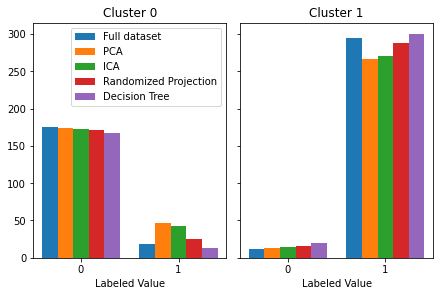

In [58]:
cat0 = []
cat1 = []
for i in range(0,len(x_train)):
    if gm_labels[i]==0:
        cat0.append(y_train[i])
    elif gm_labels[i]==1:
        cat1.append(y_train[i])
        
cat0_pca = []
cat1_pca = []
for i in range(0,len(x_train)):
    if gm_labels_pca[i]==0:
        cat0_pca.append(y_train[i])
    elif gm_labels_pca[i]==1:
        cat1_pca.append(y_train[i])
        
cat0_ica = []
cat1_ica = []
for i in range(0,len(x_train)):
    if gm_labels_ica[i]==0:
        cat0_ica.append(y_train[i])
    elif gm_labels_ica[i]==1:
        cat1_ica.append(y_train[i])
        
cat0_rp = []
cat1_rp = []
for i in range(0,len(x_train)):
    if gm_labels_rp[i]==0:
        cat0_rp.append(y_train[i])
    elif gm_labels_rp[i]==1:
        cat1_rp.append(y_train[i])
        
cat0_dt = []
cat1_dt = []
for i in range(0,len(x_train)):
    if gm_labels_dt[i]==0:
        cat0_dt.append(y_train[i])
    elif gm_labels_dt[i]==1:
        cat1_dt.append(y_train[i])

fig,axs = plt.subplots(1,2,figsize=(6,4),sharey=True,constrained_layout=True)
axs[0].hist([cat0,cat0_pca,cat1_ica,cat1_rp,cat1_dt],bins=[-0.5,0.5,1.5],label=["Full dataset","PCA","ICA","Randomized Projection","Decision Tree"])
axs[0].set_title('Cluster 0')
axs[0].set_xticks([0,1])
axs[0].set_xlabel('Labeled Value')
axs[0].legend()
axs[1].hist([cat1,cat1_pca,cat0_ica,cat0_rp,cat0_dt],bins=[-0.5,0.5,1.5],label=["Full dataset","PCA","ICA","Randomized Projection","Decision Tree"])
axs[1].set_title('Cluster 1')
axs[1].set_xticks([0,1])
axs[1].set_xlabel('Labeled Value')
plt.savefig("Images2/gm_dimreduce_categoriesvslabels.png")
plt.show()

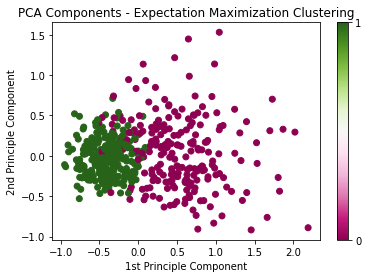

In [59]:
p = plt.scatter(x_pca[:,0],x_pca[:,1],c=gm_labels_pca,cmap="PiYG")
c = plt.colorbar(p)
c.set_ticks([0,1])
c.set_ticklabels([0,1])
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.title('PCA Components - Expectation Maximization Clustering')
plt.savefig('Images2/components12_gm_pca_clusters.png')
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=9,random_state=1)
x_pca = pca.fit_transform(x_train)
ica = FastICA(n_components=11,max_iter=1000,random_state=1)
x_ica = ica.fit_transform(x_train)
rp = GaussianRandomProjection(n_components=27,random_state=1)
x_rp = rp.fit_transform(x_train)
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=1)
dt.fit(x_train,y_train)
x_dt = dt_transform()
scaler = StandardScaler()
x_pca_scale = scaler.fit_transform(x_pca)
x_pca_test = pca.transform(x_test)
x_pca_test_scale = scaler.transform(x_pca_test)
scaler2 = StandardScaler()
x_ica_scale = scaler2.fit_transform(x_ica)
x_ica_test = ica.transform(x_test)
x_ica_test_scale = scaler2.transform(x_ica_test)
scaler3 = StandardScaler()
x_rp_scale = scaler3.fit_transform(x_rp)
x_rp_test = rp.transform(x_test)
x_rp_test_scale = scaler3.transform(x_rp_test)
scaler4 =StandardScaler()
x_dt_scale = scaler4.fit_transform(x_dt)
x_dt_test = x_test.copy()
x_dt_test = np.take(x_dt_test,indices,axis=1)
x_dt_test_scale = scaler4.transform(x_dt_test)

scaler5 = StandardScaler()
x_train_scale = scaler5.fit_transform(x_train)
x_test_scale = scaler5.transform(x_test)

In [61]:
loss_curve=[]
nn_clf_pca = MLPClassifier(hidden_layer_sizes=(6), solver='adam',warm_start=True,learning_rate_init=0.00001,max_iter=1,random_state=1)
learning_rates = np.logspace(-5,1,num=500)
for rate in learning_rates:
    nn_clf_pca.set_params(learning_rate_init=rate)
    nn_clf_pca.fit(x_pca_scale,y_train)
    loss_curve.append(nn_clf_pca.loss_)

c:\users\steph\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


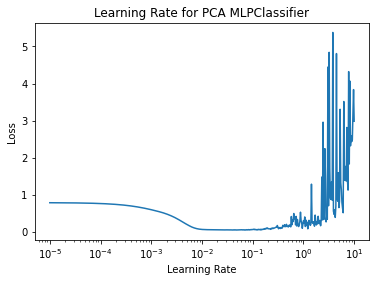

In [62]:
plt.plot(learning_rates,loss_curve)
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate for PCA MLPClassifier")
plt.savefig("Images2/nn_pca_learning_rate.png")
plt.show()

In [63]:
scores = []
cv_scores = []
for i in range(1,23):
    nn_clf_pca = MLPClassifier(hidden_layer_sizes=(i),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
    nn_clf_pca.fit(x_pca_scale,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf_pca,x_pca_scale,y_train,cv=5)))
    scores.append(nn_clf_pca.score(x_pca_scale,y_train))

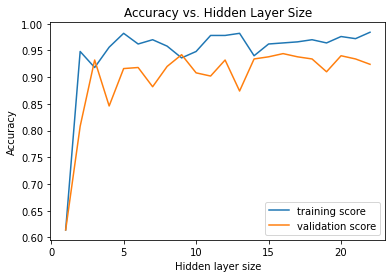

In [64]:
plt.plot(range(1,23),scores,label="training score")
plt.plot(range(1,23),cv_scores,label="validation score")
plt.legend()
plt.xlabel("Hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Hidden Layer Size")
plt.savefig("Images2/nn_pca_training_validation_curve.png")
plt.show()

In [65]:
np.argmax(cv_scores)

15

In [66]:
nn_clf_pca = MLPClassifier(hidden_layer_sizes=16,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)

In [67]:
loss_curve=[]
nn_clf_ica = MLPClassifier(hidden_layer_sizes=(6), solver='adam',warm_start=True,learning_rate_init=0.00001,max_iter=1,random_state=1)
learning_rates = np.logspace(-5,1,num=500)
for rate in learning_rates:
    nn_clf_ica.set_params(learning_rate_init=rate)
    nn_clf_ica.fit(x_ica_scale,y_train)
    loss_curve.append(nn_clf_ica.loss_)

c:\users\steph\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


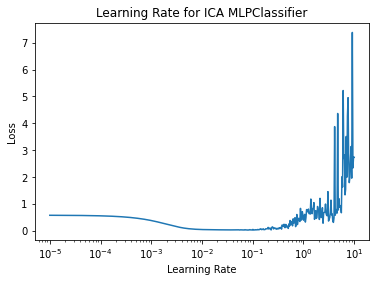

In [68]:
plt.plot(learning_rates,loss_curve)
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate for ICA MLPClassifier")
plt.savefig("Images2/nn_ica_learning_rate.png")
plt.show()

In [69]:
scores = []
cv_scores = []
for i in range(1,23):
    nn_clf_ica = MLPClassifier(hidden_layer_sizes=(i),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
    nn_clf_ica.fit(x_ica_scale,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf_ica,x_ica_scale,y_train,cv=5)))
    scores.append(nn_clf_ica.score(x_ica_scale,y_train))

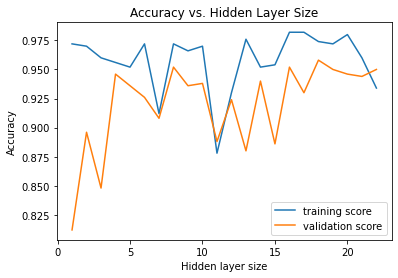

In [70]:
plt.plot(range(1,23),scores,label="training score")
plt.plot(range(1,23),cv_scores,label="validation score")
plt.legend()
plt.xlabel("Hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Hidden Layer Size")
plt.savefig("Images2/nn_ica_training_validation_curve.png")
plt.show()

In [71]:
np.argmax(cv_scores)

17

In [72]:
nn_clf_ica = MLPClassifier(hidden_layer_sizes=18,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
mean(cross_val_score(nn_clf_ica,x_ica_scale,y_train))

0.958

In [73]:
loss_curve=[]
nn_clf_rp = MLPClassifier(hidden_layer_sizes=(20), solver='adam',warm_start=True,learning_rate_init=0.00001,max_iter=1,random_state=1)
learning_rates = np.logspace(-5,1,num=500)
for rate in learning_rates:
    nn_clf_rp.set_params(learning_rate_init=rate)
    nn_clf_rp.fit(x_rp_scale,y_train)
    loss_curve.append(nn_clf_rp.loss_)

c:\users\steph\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


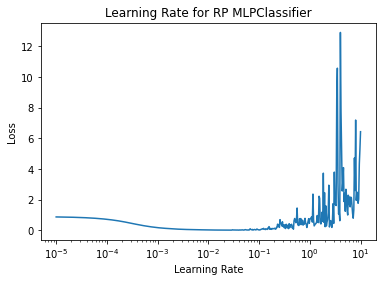

In [74]:
plt.plot(learning_rates,loss_curve)
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate for RP MLPClassifier")
plt.savefig("Images2/nn_rp_learning_rate.png")
plt.show()

In [75]:
scores = []
cv_scores = []
for i in range(1,55):
    nn_clf_rp = MLPClassifier(hidden_layer_sizes=(i),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
    nn_clf_rp.fit(x_rp_scale,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf_rp,x_rp_scale,y_train,cv=5)))
    scores.append(nn_clf_rp.score(x_rp_scale,y_train))

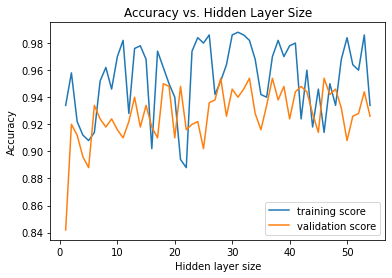

In [76]:
plt.plot(range(1,55),scores,label="training score")
plt.plot(range(1,55),cv_scores,label="validation score")
plt.legend()
plt.xlabel("Hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Hidden Layer Size")
plt.savefig("Images2/nn_rp_training_validation_curve.png")
plt.show()

In [77]:
np.argmax(cv_scores)

27

In [78]:
nn_clf_rp = MLPClassifier(hidden_layer_sizes=28,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
mean(cross_val_score(nn_clf_rp,x_rp_scale,y_train))

0.954

In [79]:
loss_curve=[]
nn_clf_dt = MLPClassifier(hidden_layer_sizes=(6), solver='adam',warm_start=True,learning_rate_init=0.00001,max_iter=1,random_state=1)
learning_rates = np.logspace(-5,1,num=500)
for rate in learning_rates:
    nn_clf_dt.set_params(learning_rate_init=rate)
    nn_clf_dt.fit(x_dt_scale,y_train)
    loss_curve.append(nn_clf_dt.loss_)

c:\users\steph\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


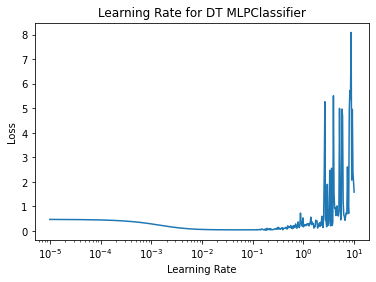

In [80]:
plt.plot(learning_rates,loss_curve)
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate for DT MLPClassifier")
plt.savefig("Images2/nn_dt_learning_rate.png")
plt.show()

In [89]:
scores = []
cv_scores = []
for i in range(1,21):
    nn_clf_dt = MLPClassifier(hidden_layer_sizes=(i),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
    nn_clf_dt.fit(x_dt_scale,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf_dt,x_dt_scale,y_train,cv=5)))
    scores.append(nn_clf_dt.score(x_dt_scale,y_train))

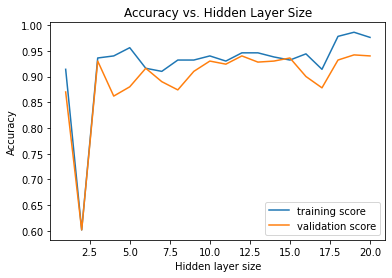

In [90]:
plt.plot(range(1,21),scores,label="training score")
plt.plot(range(1,21),cv_scores,label="validation score")
plt.legend()
plt.xlabel("Hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Hidden Layer Size")
plt.savefig("Images2/nn_dt_training_validation_curve.png")
plt.show()

In [91]:
np.argmax(cv_scores)

18

In [84]:
nn_clf_dt = MLPClassifier(hidden_layer_sizes=19,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
mean(cross_val_score(nn_clf_dt,x_dt_scale,y_train))

0.942

In [92]:
scores = []
cv_scores = []
for i in range(1,55):
    nn_clf = MLPClassifier(hidden_layer_sizes=(i),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
    nn_clf.fit(x_train,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf,x_train,y_train,cv=5)))
    scores.append(nn_clf.score(x_train,y_train))

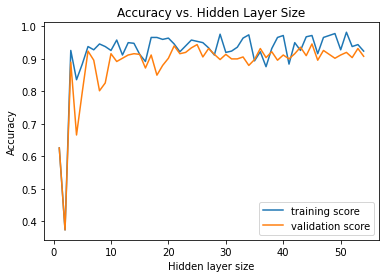

In [93]:
plt.plot(range(1,55),scores,label="training score")
plt.plot(range(1,55),cv_scores,label="validation score")
plt.legend()
plt.xlabel("Hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Hidden Layer Size")
plt.savefig("Images2/nn_normal_training_validation_curve.png")
plt.show()

In [94]:
np.argmax(cv_scores)

44

In [95]:
import time
t0 = time.perf_counter()
nn_clf = MLPClassifier(hidden_layer_sizes=45,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
nn_clf.fit(x_train,y_train)
t1 = time.perf_counter()
y_pred = nn_clf.predict(x_train)
t2 = time.perf_counter()
accuracy1 = accuracy_score(y_train,y_pred)
y_test_pred = nn_clf.predict(x_test)
accuracy = accuracy_score(y_test,y_test_pred)
print("Full Dataset: " + str(t1-t0))
print(str(t2-t1))
print(accuracy1)
print(accuracy)

t0 = time.perf_counter()
nn_clf_pca = MLPClassifier(hidden_layer_sizes=16,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
nn_clf_pca.fit(x_pca_scale,y_train)
t1 = time.perf_counter()
y_pred = nn_clf_pca.predict(x_pca_scale)
t2 = time.perf_counter()
accuracy1 = accuracy_score(y_train,y_pred)
y_test_pred = nn_clf_pca.predict(x_pca_test_scale)
accuracy = accuracy_score(y_test,y_test_pred)
print("PCA: " + str(t1-t0))
print(str(t2-t1))
print(accuracy1)
print(accuracy)

t0 = time.perf_counter()
nn_clf_ica = MLPClassifier(hidden_layer_sizes=18,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
nn_clf_ica.fit(x_ica_scale,y_train)
t1 = time.perf_counter()
y_pred = nn_clf_ica.predict(x_ica_scale)
t2 = time.perf_counter()
accuracy1 = accuracy_score(y_train,y_pred)
y_test_pred = nn_clf_ica.predict(x_ica_test_scale)
accuracy = accuracy_score(y_test,y_test_pred)
print("ICA: " + str(t1-t0))
print(str(t2-t1))
print(accuracy1)
print(accuracy)
t0 = time.perf_counter()
nn_clf_rp = MLPClassifier(hidden_layer_sizes=28,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
nn_clf_rp.fit(x_rp_scale,y_train)
t1 = time.perf_counter()
y_pred = nn_clf_rp.predict(x_rp_scale)
t2 = time.perf_counter()
accuracy1 = accuracy_score(y_train,y_pred)
y_test_pred = nn_clf_rp.predict(x_rp_test_scale)
accuracy = accuracy_score(y_test,y_test_pred)
print("RP: " + str(t1-t0))
print(str(t2-t1))
print(accuracy1)
print(accuracy)
t0 = time.perf_counter()
nn_clf_dt = MLPClassifier(hidden_layer_sizes=19,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
nn_clf_dt.fit(x_dt_scale,y_train)
t1 = time.perf_counter()
y_pred = nn_clf_dt.predict(x_dt_scale)
t2 = time.perf_counter()
accuracy1 = accuracy_score(y_train,y_pred)
y_test_pred = nn_clf_dt.predict(x_dt_test_scale)
accuracy = accuracy_score(y_test,y_test_pred)
print("Decision Tree: " + str(t1-t0))
print(str(t2-t1))
print(accuracy1)
print(accuracy)

Full Dataset: 0.08788879999997334
0.0007032000000322114
0.972
0.8985507246376812
PCA: 0.040514599999994516
0.0003600000000005821
0.964
0.9710144927536232
ICA: 0.02741350000002285
0.0002351999999632426
0.974
0.9420289855072463
RP: 0.023425400000007812
0.0012653000000000247
0.952
0.927536231884058
Decision Tree: 0.04667170000004717
0.0011284999999929823
0.986
0.8695652173913043


In [104]:
pca = PCA(n_components=9,random_state=1)
x_pca = pca.fit_transform(x_train)
kmeans = KMeans(n_clusters=2, n_init=1000,random_state=1)
kmeans_pca = kmeans.fit(x_pca)
kmeans_pca_test = kmeans.transform(x_pca_test)
scaler = StandardScaler()
x_pca_scale = scaler.fit_transform(x_pca)
x_pca_test = pca.transform(x_test)
x_pca_test_scale = scaler.transform(x_pca_test)
for i in range(0,len(x_train)):
    np.append(x_pca[i],kmeans_pca.labels_)
for i in range(0,len(x_pca_test)):
    np.append(x_pca_test[i],kmeans_pca_test)

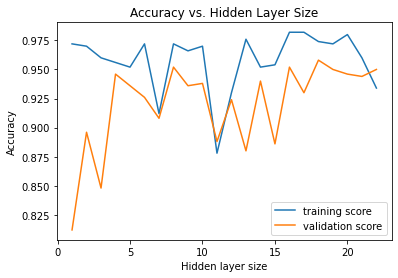

In [105]:
scores = []
cv_scores = []
for i in range(1,23):
    nn_clf_ica = MLPClassifier(hidden_layer_sizes=(i),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
    nn_clf_ica.fit(x_ica_scale,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf_ica,x_ica_scale,y_train,cv=5)))
    scores.append(nn_clf_ica.score(x_ica_scale,y_train))

plt.plot(range(1,23),scores,label="training score")
plt.plot(range(1,23),cv_scores,label="validation score")
plt.legend()
plt.xlabel("Hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Hidden Layer Size")
plt.savefig("Images2/nn_pca_training_validation_curve.png")
plt.show()

In [107]:
np.argmax(cv_scores)

17

In [108]:
t0 = time.perf_counter()
nn_clf_pca = MLPClassifier(hidden_layer_sizes=18,warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=0.01,random_state=1)
nn_clf_pca.fit(x_pca_scale,y_train)
t1 = time.perf_counter()
y_pred = nn_clf_pca.predict(x_pca_scale)
t2 = time.perf_counter()
accuracy1 = accuracy_score(y_train,y_pred)
y_test_pred = nn_clf_pca.predict(x_pca_test_scale)
accuracy = accuracy_score(y_test,y_test_pred)
print("PCA: " + str(t1-t0))
print(str(t2-t1))
print(accuracy1)
print(accuracy)

PCA: 0.04440339999996468
0.0002334000000701053
0.97
0.9855072463768116
